In [ ]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

In [ ]:

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

In [ ]:
propiedades_df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSAK7bRHbs6relqc0YuMZdr_oORpQAIw-h8vNLUmifuwhNFfn47tdv-ZQjMN3MykJJQHg3MEU13qJlD/pub?gid=1221130793&single=true&output=csv")

In [ ]:
propiedades_df.dtypes

,0
_id,object
codigo,object
tipo_propiedad,object
tipo_operacion,object
precio_venta,float64
area,float64
habitaciones,float64
banos,float64
administracion,float64
parqueaderos,float64


In [ ]:
propiedades_df.shape

(43013, 46)

In [ ]:
propiedades_df["tipo_propiedad"].value_counts()

,count
tipo_propiedad,
APARTAMENTO,42943
CASA CON CONJUNTO CERRADO,60
CASA,10


In [ ]:
propiedades_df["tipo_operacion"].value_counts()

,count
tipo_operacion,
VENTA,27270
ARRIENDO,15515
VENTA Y ARRIENDO,228


In [ ]:
propiedades_venta_df = propiedades_df[propiedades_df["tipo_operacion"].isin(["VENTA", "VENTA Y ARRIENDO"])]
propiedades_venta_df = pd.get_dummies(propiedades_venta_df, columns=["localidad", "antiguedad"], drop_first=True)
propiedades_venta_df.shape

(27498, 69)

In [ ]:
aptos_venta_df = propiedades_venta_df[
    (propiedades_venta_df["tipo_propiedad"]=="APARTAMENTO") &
    (propiedades_venta_df["area"] <= 120) &
    (propiedades_venta_df["area"] >= 30) &
    (propiedades_venta_df["banos"] != 0) &
    (propiedades_venta_df["precio_venta"] < 1000000000) &
    (propiedades_venta_df["precio_venta"] > 70000000) &
    (propiedades_venta_df["parqueaderos"] < 5) &
    (propiedades_venta_df["parqueaderos"] >= 0) &
    (propiedades_venta_df["habitaciones"] > 0) &
    (propiedades_venta_df["habitaciones"] < 6)
    ]

In [ ]:
aptos1_df = aptos_venta_df[
    (aptos_venta_df["precio_venta"] < 200000000) &
    (aptos_venta_df["precio_venta"] > 70000000) &
    (aptos_venta_df["estrato"] == 1)
    ]
aptos1_df["precio_venta"].describe().apply(lambda x: "${:,.0f}".format(x))

,precio_venta
count,$54
mean,"$144,762,196"
std,"$26,162,330"
min,"$83,000,000"
25%,"$130,201,161"
50%,"$135,970,000"
75%,"$164,025,000"
max,"$199,682,000"


In [ ]:
aptos2_df = aptos_venta_df[
    (aptos_venta_df["precio_venta"] < 500000000) &
    (aptos_venta_df["estrato"] == 2)
    ]
aptos2_df["precio_venta"].describe().apply(lambda x: "${:,.0f}".format(x))

,precio_venta
count,$889
mean,"$168,082,009"
std,"$55,643,131"
min,"$76,000,000"
25%,"$134,000,000"
50%,"$160,000,000"
75%,"$180,000,000"
max,"$485,000,000"


In [ ]:
aptos3_df = aptos_venta_df[
    (aptos_venta_df["precio_venta"] < 800000000) &
    (aptos_venta_df["estrato"] == 3)
    ]
aptos3_df["precio_venta"].describe().apply(lambda x: "${:,.0f}".format(x))

,precio_venta
count,"$3,147"
mean,"$277,853,791"
std,"$101,113,381"
min,"$100,000,000"
25%,"$198,000,000"
50%,"$255,000,000"
75%,"$330,000,000"
max,"$780,000,000"


In [ ]:
aptos4_df = aptos_venta_df[
    (aptos_venta_df["precio_venta"] > 200000000) &
    (aptos_venta_df["precio_venta"] < 2000000000) &
    (aptos_venta_df["estrato"] == 4)
    ]
aptos4_df["precio_venta"].describe().apply(lambda x: "${:,.0f}".format(x))

,precio_venta
count,"$4,944"
mean,"$455,817,998"
std,"$147,940,976"
min,"$203,000,000"
25%,"$345,000,000"
50%,"$430,000,000"
75%,"$545,000,000"
max,"$996,000,000"


In [ ]:
aptos5_df = aptos_venta_df[
    (aptos_venta_df["precio_venta"] > 200000000) &
    (aptos_venta_df["precio_venta"] < 1000000000) &
    (aptos_venta_df["estrato"] == 5)
    ]
aptos5_df["precio_venta"].describe().apply(lambda x: "${:,.0f}".format(x))

,precio_venta
count,"$2,819"
mean,"$565,026,022"
std,"$149,248,221"
min,"$225,000,000"
25%,"$452,000,000"
50%,"$550,000,000"
75%,"$660,000,000"
max,"$999,000,000"


In [ ]:
aptos6_df = aptos_venta_df[
    (aptos_venta_df["precio_venta"] > 200000000) &
    (aptos_venta_df["precio_venta"] < 1000000000) & # 3'000.000.000
    (aptos_venta_df["estrato"] == 6)
    ]
aptos6_df["precio_venta"].describe().apply(lambda x: "${:,.0f}".format(x))

,precio_venta
count,"$2,421"
mean,"$647,432,426"
std,"$166,638,066"
min,"$240,000,000"
25%,"$520,000,000"
50%,"$648,000,000"
75%,"$770,000,000"
max,"$998,500,000"


In [ ]:
aptos_df = pd.concat([aptos1_df, aptos2_df, aptos3_df, aptos4_df, aptos5_df, aptos6_df], ignore_index=True)

In [ ]:
resumen_precio = aptos_df['precio_venta'].describe().apply(lambda x: "${:,.0f}".format(x))
print(resumen_precio)

count         $14,274
mean     $451,552,080
std      $200,512,928
min       $76,000,000
25%      $295,000,000
50%      $435,598,768
75%      $585,000,000
max      $999,000,000
Name: precio_venta, dtype: object


In [ ]:
 estratos_df = aptos_df.groupby('estrato')['precio_venta'].mean()
 estratos_df.apply(lambda x: "${:,.0f}".format(x))

,precio_venta
estrato,
1.0,"$144,762,196"
2.0,"$168,082,009"
3.0,"$277,853,791"
4.0,"$455,817,998"
5.0,"$565,026,022"
6.0,"$647,432,426"


In [ ]:
aptos_df['area'].describe()

,area
count,14274.000000
mean,74.070944
std,23.046894
min,30.000000
25%,55.000000
50%,72.000000
75%,91.000000
max,120.000000


In [ ]:
features = ["estrato", "banos", "area", "parqueaderos"]# + [col for col in aptos_venta_df.columns if 'antiguedad_' in col]
print(features)

['estrato', 'banos', 'area', 'parqueaderos']


<Axes: >

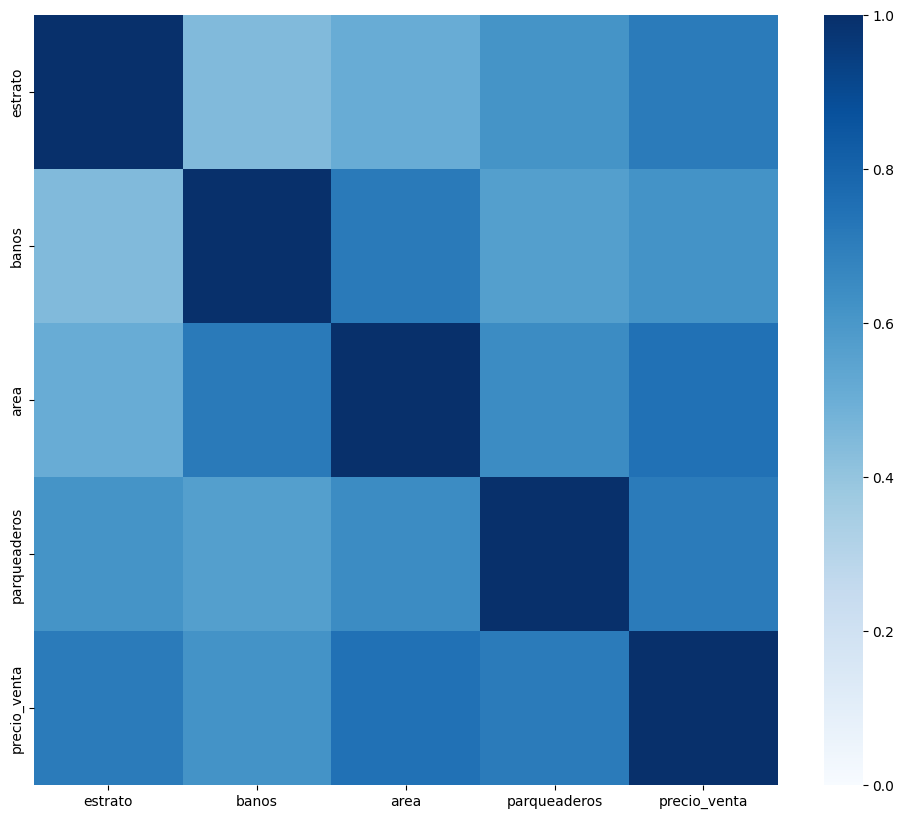

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(aptos_df[features+["precio_venta"]].corr(), cmap="Blues", vmin=0, vmax=1)

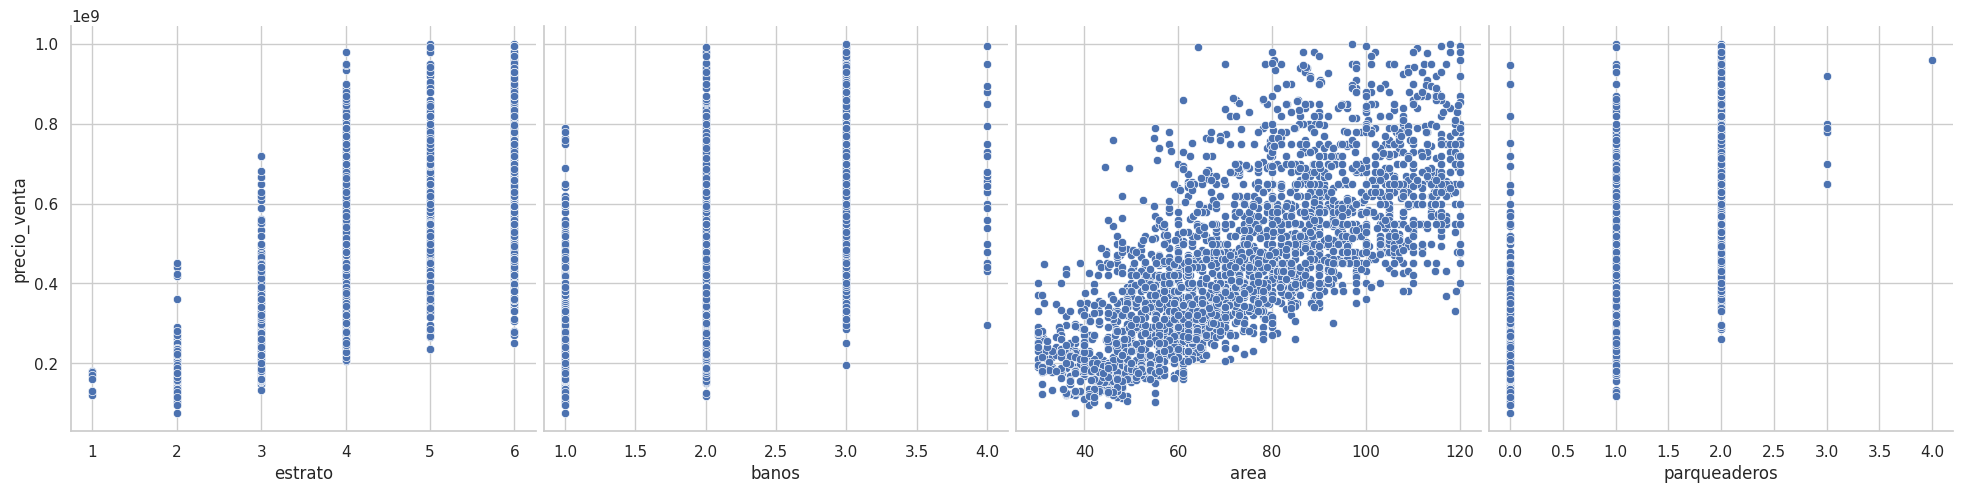

In [ ]:
sns.set(style='whitegrid')
sns.pairplot(aptos_df.sample(frac=0.2), y_vars="precio_venta", x_vars=features[0:4], kind="scatter", height=5)
# sns.pairplot(aptos_df.sample(frac=0.2), y_vars="precio_venta", x_vars=features[4:12], kind="scatter", height=5)
# sns.pairplot(aptos_df.sample(frac=0.2), y_vars="precio_venta", x_vars=features[13::], kind="scatter", height=5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(aptos_df[features], aptos_df["precio_venta"], test_size=0.3, random_state=1)

In [ ]:
X_train.shape, y_train.shape

((9991, 4), (9991,))

In [ ]:
X_test.shape, y_test.shape

((4283, 4), (4283,))

In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
pd.DataFrame({"columns": features, "coef": regression.coef_})

,columns,coef
0,estrato,6.285404e+07
1,banos,1.790136e+07
2,area,3.364390e+06
3,parqueaderos,5.854050e+07


In [ ]:
regression.intercept_

-160940087.58155352

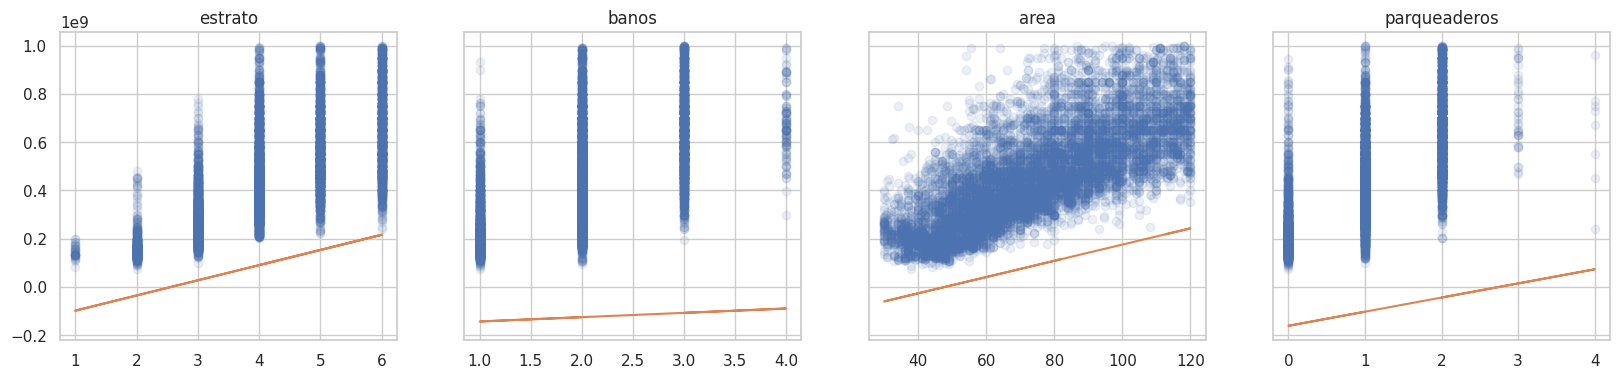

In [ ]:


f, axs = plt.subplots(nrows=1, ncols=len(features), sharey=True, figsize=(20, 4))
row = 0
for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[row].plot(x, y_train, "o", alpha=0.1)
    axs[row].plot(x, x * m + b)
    axs[row].set_title(col)
    row = row + 1

In [ ]:
print("Train:", "${:,.0f}".format(mean_absolute_error(y_train, regression.predict(X_train))))
print("Test:", "${:,.0f}".format(mean_absolute_error(y_test, regression.predict(X_test))))

Train: $78,698,181
Test: $77,759,313


In [ ]:
print("Train:", "${:,.0f}".format(np.sqrt(mean_squared_error(y_train, regression.predict(X_train)))))
print("Test:", "${:,.0f}".format(np.sqrt(mean_squared_error(y_test, regression.predict(X_test)))))

Train: $104,740,809
Test: $102,325,026


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones
y_pred = regression.predict(X_test)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2}")

RMSE: $102,325,025.84
R²: 0.7376711722736035


In [ ]:
regression.score(X_train, y_train)

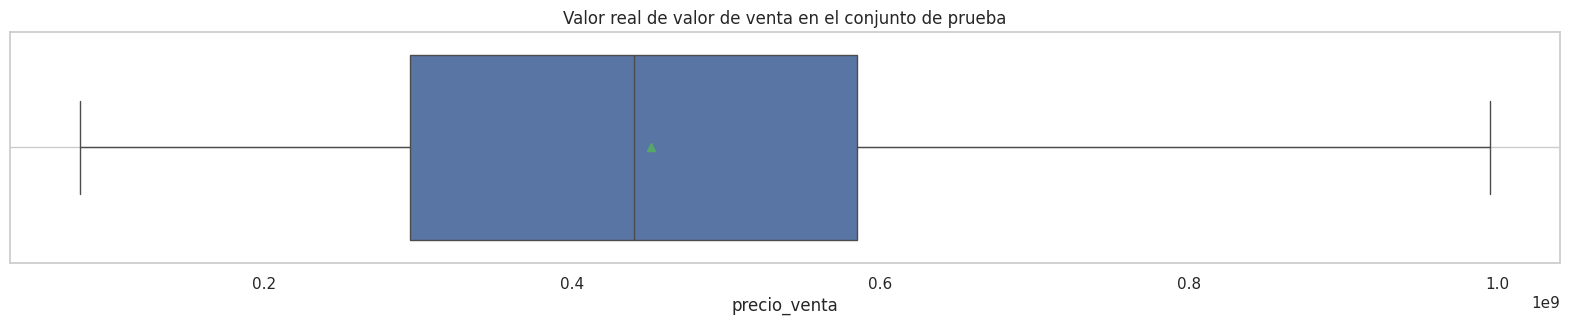

In [ ]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_test, showmeans=True, orient="h")
plt.title("Valor real de valor de venta en el conjunto de prueba")
plt.grid()
plt.show()

<ipython-input-36-92e485f914c1>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', color="red")


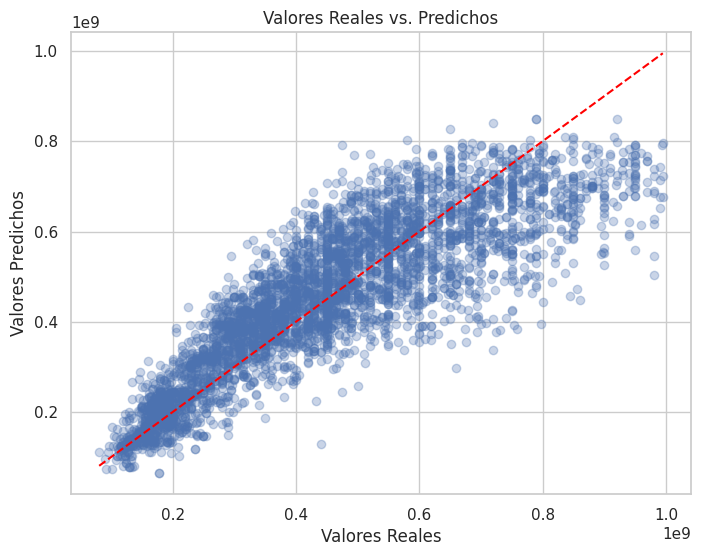

In [ ]:
y_pred = regression.predict(X_test)
y_true = y_test  # Valores reales de los precios de los apartamentos

# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.3)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', color="red")
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos')
plt.show()

In [ ]:
tolerancia = 0.2  # Margen de error del 20%

# Calcular el margen permitido
margen_inferior = y_test * (1 - tolerancia)
margen_superior = y_test * (1 + tolerancia)

# Contar las predicciones "correctas"
predicciones_correctas = ((y_pred >= margen_inferior) & (y_pred <= margen_superior)).sum()
predicciones_correctas

2651

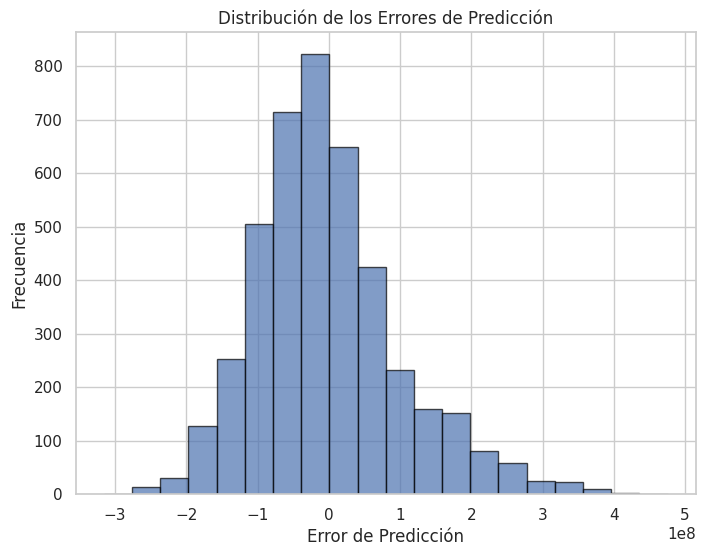

In [ ]:
errores = y_true - y_pred

# Crear histograma de errores
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción')
plt.show()

In [ ]:
ahorros_ajustados = 5 - ((1 - r2) * 6)
print(f"Ganacia por predicción: {ahorros_ajustados:,.2f} horas")

Ganacia por predicción: 3.43 horas


In [ ]:
print(f"Por lo cual en 500 predciones mensuales el ahorro en tiempo sera de 1285 horas")

Por lo cual en 500 predciones mensuales el ahorro en tiempo sera de 1285 horas


In [ ]:
print("Costo mensual sin modelo $28,500,000")
print("Costo mensual con modelo $12,207,500")
print("Costo de elaboración del modelo $4,000,000")

Costo mensual sin modelo $28,500,000
Costo mensual con modelo $12,207,500


In [ ]:
ROI = (12207500+4000000)/28500000
print(f"ROI: {ROI:,.2f} meses")

ROI: 0.57 meses
